# 导入包

In [1]:
import torch
import numpy as np
import random
from torch.utils.data import  Dataset
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 全局变量

In [2]:
batch_size=512
lr  = 0.01
epoch_num = 15
num_workers=0

# 构造数据集

In [3]:
random.seed(42)
torch.manual_seed(42)
class MultiDataSet(Dataset):
    def __init__(self, root, train=True, transform=None, download=True):
        self.mnist = torchvision.datasets.MNIST(root=root, train=train, download=download, transform=transform)
        self.targets = torch.eye(10)[self.mnist.targets]

    def __getitem__(self, index):
        image, target = self.mnist[index]
        processed_target = self.targets[index]
        return image, processed_target, target

    def __len__(self):
        return len(self.mnist)

mnist_train = MultiDataSet(root='E:/毕设文件/DeepLearning/experiment01/Datasets/MNIST', train=True,
                                    download=True, transform=transforms.ToTensor())
mnist_test = MultiDataSet(root='E:/毕设文件/DeepLearning/experiment01/Datasets/MNIST', train=False,
                                   download=True, transform=transforms.ToTensor())
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True,num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False,num_workers=num_workers)

# 定义激活函数 定义网络结构 定义网络初始化参数

In [4]:
inputs = 784
hiddens = 256
out = 10
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(inputs,hiddens)
        self.relu = torch.nn.ReLU()
        self.hidden = torch.nn.Linear(hiddens,out)
        self.softmax = torch.nn.Softmax(dim=1)
    def forward(self,x):
        x = x.view(x.size(0), -1)
        t = self.linear(x)
        t = self.relu(t)
        t = self.hidden(t)
        t = self.softmax (t)
        return  t


loss =  torch.nn.CrossEntropyLoss()


# 训练与评估模型-Rmsprop优化器

In [5]:

import time

train_loss_2 =[]
test_loss_2 = []
train_acc_2=[]
test_acc_2= []
start_time = time.time()
net2 = Net().to(device)
opt2 = torch.optim.RMSprop(params=net2.parameters(),lr=lr,alpha=0.99,eps=1e-03,centered=False)
for epoch in range(epoch_num):
    loss_list=[]
    acc_list=[]
    for data in train_iter:
        x, y, index =data
        if x.shape[0]<batch_size:
            continue
        y_hat = net2(x.to(device))
        l = loss(y_hat,y.to(device))
        opt2.zero_grad()
        l.backward()
        opt2.step()
        y_index = torch.argmax(y_hat, dim=1)
        loss_list.append(l.item())
        acc = 0
        for i in range(len(y_index)):
            if y_index[i] == index[i]:
                acc += 1
        acc_list.append(acc/len(y_index))

    train_loss_mean = np.mean(loss_list)
    train_acc_mean = np.mean(acc_list)
    train_loss_2.append(train_loss_mean)
    train_acc_2.append(train_acc_mean)
    loss_list=[]
    acc_list=[]
    for data in test_iter:
        x, y, index =data
        if x.shape[0]<batch_size:
            continue
        y_hat = net2(x.to(device))
        l = loss(y_hat,y.to(device))

        loss_list.append(l.item())
        y_index = torch.argmax(y_hat, dim=1)
        acc = 0
        for i in range(len(y_index)):
            if y_index[i] == index[i]:
                acc += 1
        acc_list.append(acc/len(y_index))


    test_loss_mean = np.mean(loss_list)
    test_acc_mean = np.mean(acc_list)
    test_loss_2.append(test_loss_mean)
    test_acc_2.append(test_acc_mean)
    print("epoch:",epoch+1,"\n",
          "train_loss:",train_loss_mean,"train_acc:",train_acc_mean,
          "\n",
          "test_loss:",test_loss_mean,"test_acc:",test_acc_mean
          )
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

epoch: 1 
 train_loss: 1.7933423050448425 train_acc: 0.6788027510683761 
 test_loss: 1.5427450506310714 test_acc: 0.9259868421052632
epoch: 2 
 train_loss: 1.533372619213202 train_acc: 0.9343449519230769 
 test_loss: 1.5173687495683368 test_acc: 0.9490131578947368
epoch: 3 
 train_loss: 1.5131415750226405 train_acc: 0.9526742788461539 
 test_loss: 1.5089192453183626 test_acc: 0.9555921052631579
epoch: 4 
 train_loss: 1.503276146375216 train_acc: 0.9618055555555556 
 test_loss: 1.497824047741137 test_acc: 0.9674136513157895
epoch: 5 
 train_loss: 1.495830063127045 train_acc: 0.9689002403846154 
 test_loss: 1.494421776972319 test_acc: 0.9691611842105263
epoch: 6 
 train_loss: 1.4906798468695746 train_acc: 0.9737913995726496 
 test_loss: 1.4905348451513993 test_acc: 0.9737870065789473
epoch: 7 
 train_loss: 1.486956595355629 train_acc: 0.9771968482905983 
 test_loss: 1.489022079267 test_acc: 0.9739925986842105
epoch: 8 
 train_loss: 1.4834441211488512 train_acc: 0.9803685897435898 
 test_

# 训练与评估模型-Moment优化器

In [6]:

import time

train_loss_0 =[]
test_loss_0 = []
train_acc_0=[]
test_acc_0= []
start_time = time.time()
net0 = Net().to(device)
opt0 = torch.optim.SGD(params=net0.parameters(),lr=lr,momentum=0.9)
for epoch in range(epoch_num):
    loss_list=[]
    acc_list=[]
    for data in train_iter:

        x, y, index =data
        if x.shape[0]<batch_size:
            continue
        y_hat = net0(x.to(device))
        l = loss(y_hat,y.to(device))
        opt0.zero_grad()
        l.backward()
        opt0.step()
        y_index = torch.argmax(y_hat, dim=1)
        loss_list.append(l.item())
        acc = 0
        for i in range(len(y_index)):
            if y_index[i] == index[i]:
                acc += 1
        acc_list.append(acc/len(y_index))

    train_loss_mean = np.mean(loss_list)
    train_acc_mean = np.mean(acc_list)
    train_loss_0.append(train_loss_mean)
    train_acc_0.append(train_acc_mean)
    loss_list=[]
    acc_list=[]
    for data in test_iter:
        x, y, index =data
        if x.shape[0]<batch_size:
            continue
        y_hat = net0(x.to(device))
        l = loss(y_hat,y.to(device))
        loss_list.append(l.item())
        y_index = torch.argmax(y_hat, dim=1)
        acc = 0
        for i in range(len(y_index)):
            if y_index[i] == index[i]:
                acc += 1
        acc_list.append(acc/len(y_index))


    test_loss_mean = np.mean(loss_list)
    test_acc_mean = np.mean(acc_list)
    test_loss_0.append(test_loss_mean)
    test_acc_0.append(test_acc_mean)
    print("epoch:",epoch+1,"\n",
          "train_loss:",train_loss_mean,"train_acc:",train_acc_mean,
          "\n",
          "test_loss:",test_loss_mean,"test_acc:",test_acc_mean
          )
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

epoch: 1 
 train_loss: 2.291353402993618 train_acc: 0.3314135950854701 
 test_loss: 2.269350240105077 test_acc: 0.4095394736842105
epoch: 2 
 train_loss: 2.2013386437016673 train_acc: 0.36847288995726496 
 test_loss: 2.0977893628572164 test_acc: 0.4349300986842105
epoch: 3 
 train_loss: 1.9950285446949494 train_acc: 0.5590444711538461 
 test_loss: 1.8908579035809165 test_acc: 0.6953125
epoch: 4 
 train_loss: 1.8323173930502346 train_acc: 0.7304186698717948 
 test_loss: 1.7645881740670455 test_acc: 0.794202302631579
epoch: 5 
 train_loss: 1.741491470581446 train_acc: 0.7950721153846154 
 test_loss: 1.7070249946493852 test_acc: 0.8148643092105263
epoch: 6 
 train_loss: 1.7019832338023388 train_acc: 0.8106470352564102 
 test_loss: 1.6801507535733675 test_acc: 0.825452302631579
epoch: 7 
 train_loss: 1.6817203444293423 train_acc: 0.8179420405982906 
 test_loss: 1.6651456481532048 test_acc: 0.8312088815789473
epoch: 8 
 train_loss: 1.6693133757664607 train_acc: 0.8234007745726496 
 test_los

# 训练与评估模型-Adam优化器

In [7]:

import time
train_loss_1 =[]
test_loss_1 = []
train_acc_1=[]
test_acc_1= []
start_time = time.time()
net1 = Net().to(device)
opt1 = torch.optim.Adam(params=net1.parameters(),lr=lr)
for epoch in range(epoch_num):
    loss_list=[]
    acc_list=[]
    for data in train_iter:
        x, y, index =data
        if x.shape[0]<batch_size:
            continue
        y_hat = net1(x.to(device))
        l = loss(y_hat,y.to(device))
        opt1.zero_grad()
        l.backward()
        opt1.step()

        y_index = torch.argmax(y_hat, dim=1)
        loss_list.append(l.item())
        acc = 0
        for i in range(len(y_index)):
            if y_index[i] == index[i]:
                acc += 1
        acc_list.append(acc/len(y_index))

    train_loss_mean = np.mean(loss_list)
    train_acc_mean = np.mean(acc_list)
    train_loss_1.append(train_loss_mean)
    train_acc_1.append(train_acc_mean)
    loss_list=[]
    acc_list=[]
    for data in test_iter:
        x, y, index =data
        if x.shape[0]<batch_size:
            continue
        y_hat = net1(x.to(device))
        l = loss(y_hat,y.to(device))
        loss_list.append(l.item())
        y_index = torch.argmax(y_hat, dim=1)
        acc = 0
        for i in range(len(y_index)):
            if y_index[i] == index[i]:
                acc += 1
        acc_list.append(acc/len(y_index))


    test_loss_mean = np.mean(loss_list)
    test_acc_mean = np.mean(acc_list)
    test_loss_1.append(test_loss_mean)
    test_acc_1.append(test_acc_mean)
    print("epoch:",epoch+1,"\n",
          "train_loss:",train_loss_mean,"train_acc:",train_acc_mean,
          "\n",
          "test_loss:",test_loss_mean,"test_acc:",test_acc_mean
          )
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

epoch: 1 
 train_loss: 1.5857688534973013 train_acc: 0.8841813568376068 
 test_loss: 1.52082916309959 test_acc: 0.9417146381578947
epoch: 2 
 train_loss: 1.5098324596372426 train_acc: 0.953392094017094 
 test_loss: 1.5056905432751304 test_acc: 0.956311677631579
epoch: 3 
 train_loss: 1.5002439633393898 train_acc: 0.962089342948718 
 test_loss: 1.4981356921948885 test_acc: 0.964124177631579
epoch: 4 
 train_loss: 1.4930663047692714 train_acc: 0.9689336271367521 
 test_loss: 1.4989876747131348 test_acc: 0.963610197368421
epoch: 5 
 train_loss: 1.4890284202037714 train_acc: 0.9726395566239316 
 test_loss: 1.4937533265665959 test_acc: 0.9676192434210527
epoch: 6 
 train_loss: 1.4861065128929594 train_acc: 0.9755442040598291 
 test_loss: 1.4925304588518644 test_acc: 0.9691611842105263
epoch: 7 
 train_loss: 1.4839595505315015 train_acc: 0.9776976495726496 
 test_loss: 1.4887018454702277 test_acc: 0.9728618421052632
epoch: 8 
 train_loss: 1.4833886633571396 train_acc: 0.9779480502136753 
 te

# 结果评估与图形可视化
- Momentum 运行352秒
- Adam 运行332秒
- rmsprop 运行298.81秒
不同优化器对模型的性能产生了影响。在这个特定任务中，Adam优化器表现得较好，达到了最高的准确率。RMSprop优化器次之，而Momentum优化器表现相对较差。

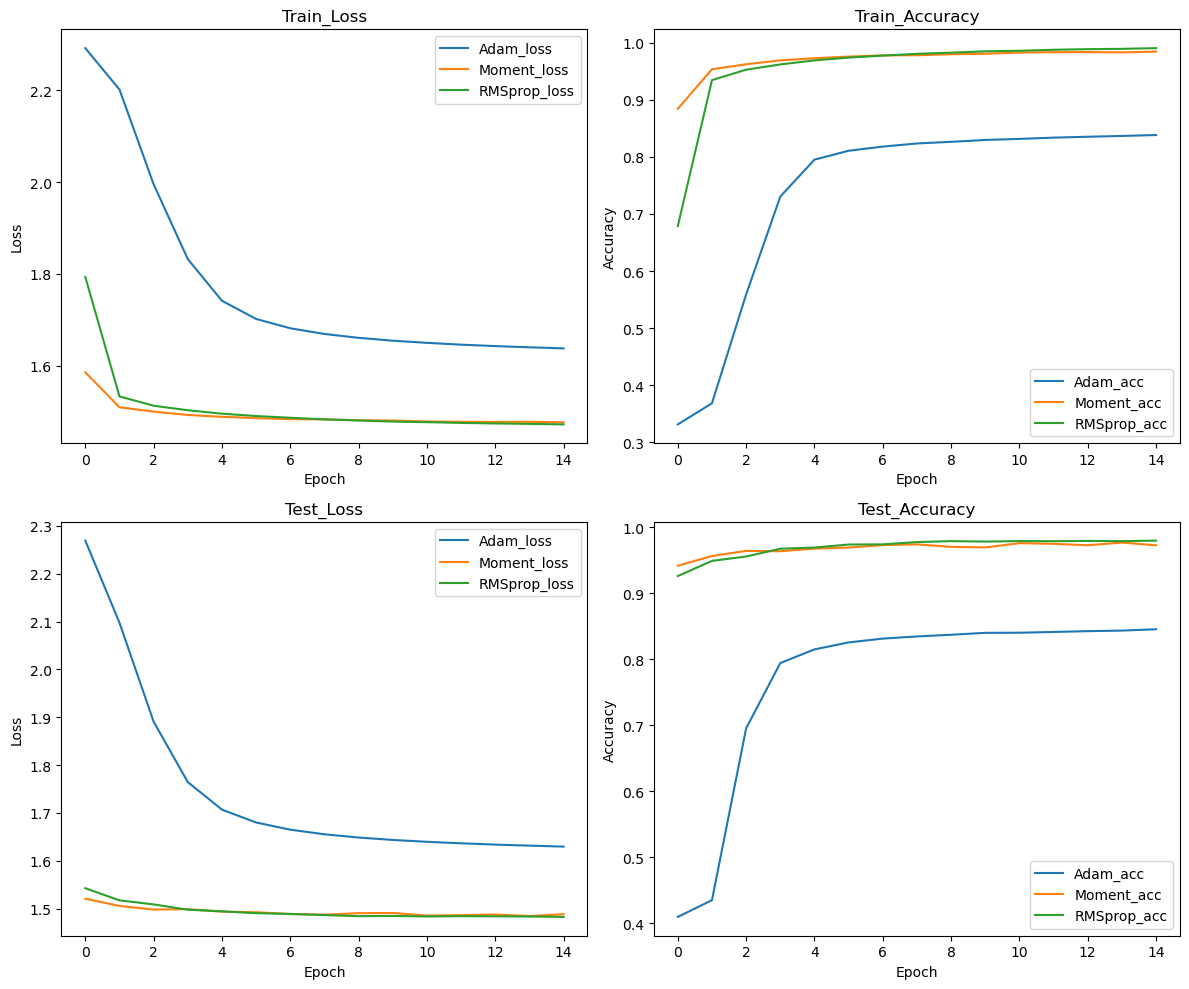

In [8]:
# 示例数据
train_loss = [train_loss_0, train_loss_1, train_loss_2]
test_loss = [test_loss_0, test_loss_1, test_loss_2]
train_acc = [train_acc_0, train_acc_1, train_acc_2]
test_acc = [test_acc_0, test_acc_1, test_acc_2]
titles_loss = ['Train_Loss', 'Test_Loss']
titles_acc = ['Train_Accuracy', 'Test_Accuracy']
labels = ['Adam', 'Moment', 'RMSprop']

# 创建2x2的图，并添加脚标
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 绘制Train_Loss和Test_Loss
for i in range(3):
    ax_train_loss = axes[0, 0]
    ax_train_loss.plot(train_loss[i], label=f'{labels[i]}_loss')

    ax_test_loss = axes[1, 0]
    ax_test_loss.plot(test_loss[i], label=f'{labels[i]}_loss')

# 绘制Train_Accuracy和Test_Accuracy
for i in range(3):
    ax_train_acc = axes[0, 1]
    ax_train_acc.plot(train_acc[i], label=f'{labels[i]}_acc')

    ax_test_acc = axes[1, 1]
    ax_test_acc.plot(test_acc[i], label=f'{labels[i]}_acc')

# 设置标题和标签
for ax in axes.flat:
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss' if ax in [axes[0, 0], axes[1, 0]] else 'Accuracy')

axes[0, 0].set_title(titles_loss[0])
axes[0, 0].legend()

axes[1, 0].set_title(titles_loss[1])
axes[1, 0].legend()

axes[0, 1].set_title(titles_acc[0])
axes[0, 1].legend()

axes[1, 1].set_title(titles_acc[1])
axes[1, 1].legend()

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()
